# Notebook 02: Structure Validation and Preparation

## The Most Critical Step in DFT Calculations

**"If you put garbage structure into DFT, you will get garbage results out."**

This notebook teaches the validation steps that MUST be performed before running ANY DFT calculation.

---

## Learning Objectives

1. Verify charge neutrality of proposed compounds
2. Use Shannon ionic radii for bond length estimation
3. Estimate lattice parameters before calculations
4. Visualize and validate structures
5. Identify space groups and crystal systems
6. Convert structures to QE format

---

## 1. Charge Neutrality Check

### Why This Matters

A stable ionic compound must be charge-neutral. If the oxidation states don't sum to zero, the compound is either:
- Incorrectly formulated
- A non-stoichiometric defect compound (requires special treatment)
- Simply impossible

### The Rule

For compound $A_x B_y C_z$:

$$\sum_i n_i \times \text{oxidation}_i = 0$$

In [1]:
import numpy as np
from typing import Dict, List, Tuple, Optional

# Common oxidation states for elements
COMMON_OXIDATION_STATES = {
    # Alkali metals
    'Li': [1], 'Na': [1], 'K': [1], 'Rb': [1], 'Cs': [1],
    # Alkaline earth metals
    'Be': [2], 'Mg': [2], 'Ca': [2], 'Sr': [2], 'Ba': [2],
    # Transition metals (common states)
    'Sc': [3], 'Ti': [2, 3, 4], 'V': [2, 3, 4, 5], 'Cr': [2, 3, 6],
    'Mn': [2, 3, 4, 7], 'Fe': [2, 3], 'Co': [2, 3], 'Ni': [2, 3],
    'Cu': [1, 2], 'Zn': [2], 'Zr': [4], 'Nb': [3, 5], 'Mo': [4, 6],
    'Ru': [3, 4], 'Rh': [3], 'Pd': [2, 4], 'Ag': [1], 'Cd': [2],
    'Hf': [4], 'Ta': [5], 'W': [4, 6], 'Re': [4, 7], 'Os': [4],
    'Ir': [3, 4], 'Pt': [2, 4], 'Au': [1, 3],
    # Main group elements
    'Al': [3], 'Ga': [3], 'In': [3], 'Tl': [1, 3],
    'Si': [4], 'Ge': [2, 4], 'Sn': [2, 4], 'Pb': [2, 4],
    'P': [-3, 3, 5], 'As': [-3, 3, 5], 'Sb': [-3, 3, 5], 'Bi': [3, 5],
    'S': [-2, 4, 6], 'Se': [-2, 4, 6], 'Te': [-2, 4, 6],
    # Halogens and chalcogens
    'O': [-2], 'F': [-1], 'Cl': [-1], 'Br': [-1], 'I': [-1],
    'N': [-3, 3, 5],
    # Lanthanides (typical +3)
    'La': [3], 'Ce': [3, 4], 'Pr': [3], 'Nd': [3], 'Sm': [2, 3],
    'Eu': [2, 3], 'Gd': [3], 'Tb': [3, 4], 'Dy': [3], 'Ho': [3],
    'Er': [3], 'Tm': [3], 'Yb': [2, 3], 'Lu': [3]
}

def check_charge_neutrality(composition: Dict[str, int], 
                            oxidation_states: Dict[str, int]) -> Tuple[bool, float]:
    """
    Check if a compound is charge-neutral.
    
    Parameters
    ----------
    composition : dict
        Element symbols mapped to their counts, e.g., {'Ba': 1, 'Ti': 1, 'O': 3}
    oxidation_states : dict
        Element symbols mapped to their oxidation states, e.g., {'Ba': 2, 'Ti': 4, 'O': -2}
    
    Returns
    -------
    is_neutral : bool
        True if sum of charges equals zero
    total_charge : float
        The total charge (should be 0.0 for neutral compounds)
    
    Example
    -------
    >>> check_charge_neutrality({'Ba': 1, 'Ti': 1, 'O': 3}, {'Ba': 2, 'Ti': 4, 'O': -2})
    (True, 0.0)
    """
    total_charge = 0.0
    
    for element, count in composition.items():
        if element not in oxidation_states:
            print(f"Warning: No oxidation state provided for {element}")
            return False, float('nan')
        total_charge += count * oxidation_states[element]
    
    is_neutral = abs(total_charge) < 1e-6
    return is_neutral, total_charge

# Example: BaTiO3 (Barium Titanate)
print("=" * 60)
print("Charge Neutrality Check Examples")
print("=" * 60)

# BaTiO3
comp_batio3 = {'Ba': 1, 'Ti': 1, 'O': 3}
ox_batio3 = {'Ba': 2, 'Ti': 4, 'O': -2}
neutral, charge = check_charge_neutrality(comp_batio3, ox_batio3)
print(f"\nBaTiO3: Ba²⁺ + Ti⁴⁺ + 3×O²⁻ = {charge}")
print(f"  Charge neutral: {neutral} ✓" if neutral else f"  NOT neutral! Charge = {charge}")

# SrTiO3
comp_srtio3 = {'Sr': 1, 'Ti': 1, 'O': 3}
ox_srtio3 = {'Sr': 2, 'Ti': 4, 'O': -2}
neutral, charge = check_charge_neutrality(comp_srtio3, ox_srtio3)
print(f"\nSrTiO3: Sr²⁺ + Ti⁴⁺ + 3×O²⁻ = {charge}")
print(f"  Charge neutral: {neutral} ✓" if neutral else f"  NOT neutral! Charge = {charge}")

# Fe2O3
comp_fe2o3 = {'Fe': 2, 'O': 3}
ox_fe2o3 = {'Fe': 3, 'O': -2}
neutral, charge = check_charge_neutrality(comp_fe2o3, ox_fe2o3)
print(f"\nFe2O3: 2×Fe³⁺ + 3×O²⁻ = {charge}")
print(f"  Charge neutral: {neutral} ✓" if neutral else f"  NOT neutral! Charge = {charge}")

# Invalid compound example
comp_invalid = {'Ba': 1, 'Ti': 1, 'O': 2}  # Wrong stoichiometry
ox_invalid = {'Ba': 2, 'Ti': 4, 'O': -2}
neutral, charge = check_charge_neutrality(comp_invalid, ox_invalid)
print(f"\nBaTiO2 (wrong): Ba²⁺ + Ti⁴⁺ + 2×O²⁻ = {charge}")
print(f"  Charge neutral: {neutral}" if neutral else f"  NOT neutral! Total charge = {charge} ✗")

Charge Neutrality Check Examples

BaTiO3: Ba²⁺ + Ti⁴⁺ + 3×O²⁻ = 0.0
  Charge neutral: True ✓

SrTiO3: Sr²⁺ + Ti⁴⁺ + 3×O²⁻ = 0.0
  Charge neutral: True ✓

Fe2O3: 2×Fe³⁺ + 3×O²⁻ = 0.0
  Charge neutral: True ✓

BaTiO2 (wrong): Ba²⁺ + Ti⁴⁺ + 2×O²⁻ = 2.0
  NOT neutral! Total charge = 2.0 ✗


---

## 2. Shannon Ionic Radii

### Why Use Ionic Radii?

Shannon ionic radii allow us to:
1. **Estimate bond lengths**: $d_{A-B} \approx r_A + r_B$
2. **Estimate lattice parameters**: Using packing considerations
3. **Predict coordination numbers**: Radius ratio rules
4. **Check structure reasonableness**: Unrealistic bond lengths = wrong structure

### Reference
R.D. Shannon, "Revised Effective Ionic Radii", Acta Cryst. A32, 751 (1976)

In [2]:
# Shannon Ionic Radii Database (Å)
# Format: {element: {oxidation: {coordination: radius}}}
SHANNON_RADII = {
    # Alkali metals
    'Li': {1: {4: 0.59, 6: 0.76, 8: 0.92}},
    'Na': {1: {4: 0.99, 6: 1.02, 8: 1.18, 12: 1.39}},
    'K':  {1: {6: 1.38, 8: 1.51, 12: 1.64}},
    'Rb': {1: {6: 1.52, 8: 1.61, 12: 1.72}},
    'Cs': {1: {6: 1.67, 8: 1.74, 12: 1.88}},
    
    # Alkaline earth metals
    'Be': {2: {4: 0.27, 6: 0.45}},
    'Mg': {2: {4: 0.57, 6: 0.72, 8: 0.89}},
    'Ca': {2: {6: 1.00, 8: 1.12, 12: 1.34}},
    'Sr': {2: {6: 1.18, 8: 1.26, 12: 1.44}},
    'Ba': {2: {6: 1.35, 8: 1.42, 12: 1.61}},
    
    # Transition metals (selected)
    'Ti': {
        2: {6: 0.86},
        3: {6: 0.67},
        4: {4: 0.42, 6: 0.605, 8: 0.74}
    },
    'V': {
        2: {6: 0.79},
        3: {6: 0.64},
        4: {6: 0.58},
        5: {4: 0.355, 6: 0.54}
    },
    'Cr': {
        2: {6: 0.80},  # HS
        3: {6: 0.615},
        6: {4: 0.26, 6: 0.44}
    },
    'Mn': {
        2: {4: 0.66, 6: 0.83},  # HS
        3: {6: 0.645},  # HS
        4: {4: 0.39, 6: 0.53},
        7: {4: 0.25}
    },
    'Fe': {
        2: {4: 0.63, 6: 0.78},  # HS
        3: {4: 0.49, 6: 0.645}  # HS
    },
    'Co': {
        2: {4: 0.58, 6: 0.745},  # HS
        3: {6: 0.61}  # HS
    },
    'Ni': {
        2: {4: 0.55, 6: 0.69},
        3: {6: 0.56}  # LS
    },
    'Cu': {
        1: {2: 0.46, 4: 0.60, 6: 0.77},
        2: {4: 0.57, 6: 0.73}
    },
    'Zn': {2: {4: 0.60, 6: 0.74, 8: 0.90}},
    'Zr': {4: {4: 0.59, 6: 0.72, 8: 0.84}},
    
    # Main group elements
    'Al': {3: {4: 0.39, 6: 0.535}},
    'Ga': {3: {4: 0.47, 6: 0.62}},
    'In': {3: {6: 0.80, 8: 0.92}},
    'Si': {4: {4: 0.26, 6: 0.40}},
    'Ge': {4: {4: 0.39, 6: 0.53}},
    'Sn': {
        2: {6: 0.93},
        4: {4: 0.55, 6: 0.69}
    },
    'Pb': {
        2: {6: 1.19, 8: 1.29},
        4: {4: 0.65, 6: 0.775}
    },
    
    # Anions
    'O':  {-2: {2: 1.35, 3: 1.36, 4: 1.38, 6: 1.40, 8: 1.42}},
    'S':  {-2: {6: 1.84}},
    'Se': {-2: {6: 1.98}},
    'Te': {-2: {6: 2.21}},
    'F':  {-1: {2: 1.285, 4: 1.31, 6: 1.33}},
    'Cl': {-1: {6: 1.81}},
    'Br': {-1: {6: 1.96}},
    'I':  {-1: {6: 2.20}},
    'N':  {-3: {4: 1.46}},
    
    # Lanthanides (+3 state, CN=6)
    'La': {3: {6: 1.032, 8: 1.16, 12: 1.36}},
    'Ce': {3: {6: 1.01}, 4: {6: 0.87}},
    'Pr': {3: {6: 0.99}},
    'Nd': {3: {6: 0.983}},
    'Gd': {3: {6: 0.938}},
    'Dy': {3: {6: 0.912}},
    'Er': {3: {6: 0.89}},
    'Yb': {2: {6: 1.02}, 3: {6: 0.868}},
    'Lu': {3: {6: 0.861}}
}

def get_shannon_radius(element: str, oxidation: int, coordination: int) -> Optional[float]:
    """
    Get Shannon ionic radius for an element.
    
    Parameters
    ----------
    element : str
        Element symbol
    oxidation : int
        Oxidation state
    coordination : int
        Coordination number
    
    Returns
    -------
    radius : float or None
        Ionic radius in Angstrom, or None if not found
    """
    if element not in SHANNON_RADII:
        print(f"Element {element} not in database")
        return None
    
    if oxidation not in SHANNON_RADII[element]:
        print(f"Oxidation state {oxidation} not available for {element}")
        return None
    
    if coordination not in SHANNON_RADII[element][oxidation]:
        available = list(SHANNON_RADII[element][oxidation].keys())
        print(f"CN={coordination} not available for {element}{oxidation:+d}. Available: {available}")
        return None
    
    return SHANNON_RADII[element][oxidation][coordination]

# Examples
print("Shannon Ionic Radii Examples (Å)")
print("=" * 50)

examples = [
    ('Ba', 2, 12),
    ('Ti', 4, 6),
    ('O', -2, 6),
    ('Fe', 3, 6),
    ('Sr', 2, 12),
]

for elem, ox, cn in examples:
    r = get_shannon_radius(elem, ox, cn)
    if r:
        print(f"{elem}{ox:+d} (CN={cn}): {r:.3f} Å")

Shannon Ionic Radii Examples (Å)
Ba+2 (CN=12): 1.610 Å
Ti+4 (CN=6): 0.605 Å
O-2 (CN=6): 1.400 Å
Fe+3 (CN=6): 0.645 Å
Sr+2 (CN=12): 1.440 Å


---

## 3. Lattice Parameter Estimation

Before running expensive DFT calculations, we can estimate lattice parameters using:

### Method 1: Ionic Radii Sum

For simple structures like rock salt (NaCl):
$$a \approx 2(r_{cation} + r_{anion})$$

For perovskites (ABO₃):
$$a \approx \sqrt{2}(r_A + r_O) \approx 2(r_B + r_O)$$

### Method 2: Isostructural Scaling (Vegard's Law)

If you know the lattice parameter of a similar compound:
$$a_{new} \approx a_{ref} \times \frac{\sum r_{new}}{\sum r_{ref}}$$

In [3]:
def estimate_perovskite_lattice(A: str, B: str, X: str = 'O',
                                 A_ox: int = 2, B_ox: int = 4, X_ox: int = -2,
                                 A_cn: int = 12, B_cn: int = 6, X_cn: int = 6) -> float:
    """
    Estimate cubic perovskite lattice parameter from ionic radii.
    
    For perovskite ABX3:
    a ≈ sqrt(2) * (r_A + r_X) from A-site perspective
    a ≈ 2 * (r_B + r_X) from B-site perspective
    
    Returns average of both estimates.
    """
    r_A = get_shannon_radius(A, A_ox, A_cn)
    r_B = get_shannon_radius(B, B_ox, B_cn)
    r_X = get_shannon_radius(X, X_ox, X_cn)
    
    if r_A is None or r_B is None or r_X is None:
        return None
    
    # Two estimates
    a_from_A = np.sqrt(2) * (r_A + r_X)
    a_from_B = 2 * (r_B + r_X)
    
    # Average (with slight preference for B-site estimate)
    a_estimate = 0.4 * a_from_A + 0.6 * a_from_B
    
    return a_estimate

def goldschmidt_tolerance_factor(A: str, B: str, X: str = 'O',
                                  A_ox: int = 2, B_ox: int = 4, X_ox: int = -2,
                                  A_cn: int = 12, B_cn: int = 6, X_cn: int = 6) -> float:
    """
    Calculate Goldschmidt tolerance factor for perovskites.
    
    t = (r_A + r_X) / [sqrt(2) * (r_B + r_X)]
    
    t ≈ 1.0: Ideal cubic perovskite
    t < 1.0: B-site too large, octahedral tilting
    t > 1.0: A-site too large, hexagonal perovskite possible
    
    Stability range: ~0.8 < t < 1.1
    """
    r_A = get_shannon_radius(A, A_ox, A_cn)
    r_B = get_shannon_radius(B, B_ox, B_cn)
    r_X = get_shannon_radius(X, X_ox, X_cn)
    
    if r_A is None or r_B is None or r_X is None:
        return None
    
    t = (r_A + r_X) / (np.sqrt(2) * (r_B + r_X))
    return t

# Example calculations
print("Perovskite Lattice Parameter Estimation")
print("=" * 60)

perovskites = [
    ('SrTiO3', 'Sr', 'Ti', 3.905),  # Experimental a = 3.905 Å
    ('BaTiO3', 'Ba', 'Ti', 4.01),   # Experimental a ≈ 4.01 Å (cubic)
    ('CaTiO3', 'Ca', 'Ti', 3.84),   # Experimental (pseudocubic)
]

for name, A, B, a_exp in perovskites:
    a_est = estimate_perovskite_lattice(A, B)
    t = goldschmidt_tolerance_factor(A, B)
    error = 100 * (a_est - a_exp) / a_exp if a_est else None
    
    print(f"\n{name}:")
    print(f"  Tolerance factor: t = {t:.3f}")
    print(f"  Estimated a = {a_est:.3f} Å")
    print(f"  Experimental a = {a_exp:.3f} Å")
    print(f"  Error: {error:+.1f}%" if error else "  Could not estimate")

Perovskite Lattice Parameter Estimation

SrTiO3:
  Tolerance factor: t = 1.002
  Estimated a = 4.013 Å
  Experimental a = 3.905 Å
  Error: +2.8%

BaTiO3:
  Tolerance factor: t = 1.062
  Estimated a = 4.109 Å
  Experimental a = 4.010 Å
  Error: +2.5%

CaTiO3:
  Tolerance factor: t = 0.966
  Estimated a = 3.956 Å
  Experimental a = 3.840 Å
  Error: +3.0%


---

## 4. Space Group and Symmetry

Using `spglib` to identify the space group of a structure.

In [4]:
# =============================================================================
# Using spglib and pymatgen for Robust Symmetry Analysis
# =============================================================================

import importlib.util

# Check for spglib
SPGLIB_AVAILABLE = importlib.util.find_spec("spglib") is not None
if SPGLIB_AVAILABLE:
    import spglib
    print(f"spglib available: version {getattr(spglib, '__version__', 'unknown')}")
else:
    print("spglib not available. Install with: pip install spglib")

# Check for pymatgen
PYMATGEN_AVAILABLE = importlib.util.find_spec("pymatgen") is not None
if PYMATGEN_AVAILABLE:
    from pymatgen.core import Structure, Lattice
    from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
    print("pymatgen available for advanced symmetry analysis")
else:
    print("pymatgen not available. Install with: pip install pymatgen")


def get_space_group_spglib(lattice, positions, numbers, symprec=1e-5):
    """Get space group using spglib."""
    if not SPGLIB_AVAILABLE:
        return {'error': 'spglib not available'}
    
    cell = (lattice, positions, numbers)
    spg = spglib.get_spacegroup(cell, symprec=symprec)
    symmetry = spglib.get_symmetry(cell, symprec=symprec)
    std_cell = spglib.standardize_cell(cell, symprec=symprec)
    
    return {
        'spacegroup': spg,
        'n_operations': len(symmetry['rotations']) if symmetry else 0,
        'standardized_cell': std_cell
    }


def get_space_group_pymatgen(lattice, positions, species, symprec=0.1):
    """Get space group using pymatgen (more robust for distorted structures)."""
    if not PYMATGEN_AVAILABLE:
        return {'error': 'pymatgen not available'}
    
    lat = Lattice(lattice)
    struct = Structure(lat, species, positions, coords_are_cartesian=False)
    
    analyzer = SpacegroupAnalyzer(struct, symprec=symprec)
    
    return {
        'spacegroup_symbol': analyzer.get_space_group_symbol(),
        'spacegroup_number': analyzer.get_space_group_number(),
        'crystal_system': analyzer.get_crystal_system(),
        'point_group': analyzer.get_point_group_symbol(),
        'n_operations': len(analyzer.get_symmetry_operations()),
        'conventional_structure': analyzer.get_conventional_standard_structure(),
        'primitive_structure': analyzer.get_primitive_standard_structure()
    }


# Example: Silicon diamond structure
a_si = 5.43  # Angstrom
lattice_si = a_si * np.eye(3)
positions_si = np.array([
    [0.00, 0.00, 0.00], [0.50, 0.50, 0.00],
    [0.50, 0.00, 0.50], [0.00, 0.50, 0.50],
    [0.25, 0.25, 0.25], [0.75, 0.75, 0.25],
    [0.75, 0.25, 0.75], [0.25, 0.75, 0.75]
])
species_si = ['Si'] * 8
numbers_si = [14] * 8

print("\n" + "=" * 60)
print("Silicon Space Group Analysis")
print("=" * 60)

if SPGLIB_AVAILABLE:
    info_spg = get_space_group_spglib(lattice_si, positions_si, numbers_si)
    print(f"\nspglib result: {info_spg['spacegroup']}")
    print(f"  Symmetry operations: {info_spg['n_operations']}")

if PYMATGEN_AVAILABLE:
    info_pmg = get_space_group_pymatgen(lattice_si, positions_si, species_si)
    print(f"\npymatgen result: {info_pmg['spacegroup_symbol']} (#{info_pmg['spacegroup_number']})")
    print(f"  Crystal system: {info_pmg['crystal_system']}")
    print(f"  Point group: {info_pmg['point_group']}")
    print(f"  Symmetry operations: {info_pmg['n_operations']}")

spglib available: version 2.6.0
pymatgen available for advanced symmetry analysis

Silicon Space Group Analysis

spglib result: Fd-3m (227)
  Symmetry operations: 192

pymatgen result: Fd-3m (#227)
  Crystal system: cubic
  Point group: m-3m
  Symmetry operations: 192


---

## 5. Converting to QE Format

Once your structure is validated, convert it to Quantum ESPRESSO format.

In [5]:
def write_qe_structure(lattice, positions, symbols, 
                        coord_type='crystal', output_format='card'):
    """
    Generate QE structure cards.
    
    Parameters
    ----------
    lattice : array
        3x3 lattice vectors in Angstrom
    positions : array
        Atomic positions
    symbols : list
        Element symbols
    coord_type : str
        'crystal' for fractional, 'angstrom' for Cartesian
    
    Returns
    -------
    str : QE-formatted structure cards
    """
    lines = []
    
    # CELL_PARAMETERS
    lines.append("CELL_PARAMETERS {angstrom}")
    for vec in lattice:
        lines.append(f"  {vec[0]:16.10f}  {vec[1]:16.10f}  {vec[2]:16.10f}")
    lines.append("")
    
    # ATOMIC_POSITIONS
    lines.append(f"ATOMIC_POSITIONS {{{coord_type}}}")
    for sym, pos in zip(symbols, positions):
        lines.append(f"  {sym:4s}  {pos[0]:16.10f}  {pos[1]:16.10f}  {pos[2]:16.10f}")
    
    return '\n'.join(lines)

# Example: SrTiO3 perovskite
a_sto = 3.905  # Angstrom
lattice_sto = a_sto * np.eye(3)
positions_sto = np.array([
    [0.0, 0.0, 0.0],   # Sr at corner
    [0.5, 0.5, 0.5],   # Ti at body center
    [0.5, 0.5, 0.0],   # O at face centers
    [0.5, 0.0, 0.5],
    [0.0, 0.5, 0.5]
])
symbols_sto = ['Sr', 'Ti', 'O', 'O', 'O']

print("SrTiO3 Structure for Quantum ESPRESSO:")
print("=" * 50)
print(write_qe_structure(lattice_sto, positions_sto, symbols_sto))

SrTiO3 Structure for Quantum ESPRESSO:
CELL_PARAMETERS {angstrom}
      3.9050000000      0.0000000000      0.0000000000
      0.0000000000      3.9050000000      0.0000000000
      0.0000000000      0.0000000000      3.9050000000

ATOMIC_POSITIONS {crystal}
  Sr        0.0000000000      0.0000000000      0.0000000000
  Ti        0.5000000000      0.5000000000      0.5000000000
  O         0.5000000000      0.5000000000      0.0000000000
  O         0.5000000000      0.0000000000      0.5000000000
  O         0.0000000000      0.5000000000      0.5000000000


---

## 6. Pre-DFT Checklist

Before running any DFT calculation, verify:

- [ ] **Source**: Structure from reliable database (Materials Project, ICSD, etc.)
- [ ] **Charge neutrality**: Sum of oxidation states × stoichiometry = 0
- [ ] **Bond lengths**: All bonds within reasonable range (ionic radii sum ± 20%)
- [ ] **No overlaps**: Minimum interatomic distance > 1.0 Å
- [ ] **Space group**: Matches expected symmetry
- [ ] **Visualization**: Checked in VESTA or similar
- [ ] **Lattice parameters**: Within ~10% of literature values (if known)

In [6]:
def validate_structure(lattice, positions, symbols, 
                       composition, oxidation_states,
                       min_distance=1.0):
    """
    Perform structure validation checks.
    
    Returns dict with validation results.
    """
    results = {'passed': True, 'checks': {}}
    
    # 1. Charge neutrality
    neutral, total_charge = check_charge_neutrality(composition, oxidation_states)
    results['checks']['charge_neutrality'] = {
        'passed': neutral,
        'total_charge': total_charge
    }
    if not neutral:
        results['passed'] = False
    
    # 2. Minimum interatomic distance
    n_atoms = len(positions)
    min_dist = float('inf')
    
    # Convert to Cartesian if needed
    cart_positions = positions @ lattice
    
    for i in range(n_atoms):
        for j in range(i+1, n_atoms):
            # Check in periodic images too
            for dx in [-1, 0, 1]:
                for dy in [-1, 0, 1]:
                    for dz in [-1, 0, 1]:
                        shift = dx * lattice[0] + dy * lattice[1] + dz * lattice[2]
                        dist = np.linalg.norm(cart_positions[i] - cart_positions[j] - shift)
                        if dist > 0.01:  # Exclude self
                            min_dist = min(min_dist, dist)
    
    results['checks']['min_distance'] = {
        'passed': min_dist > min_distance,
        'value': min_dist,
        'threshold': min_distance
    }
    if min_dist <= min_distance:
        results['passed'] = False
    
    # 3. Cell volume sanity check (not too small, not too large)
    volume = abs(np.linalg.det(lattice))
    vol_per_atom = volume / n_atoms
    results['checks']['volume'] = {
        'total': volume,
        'per_atom': vol_per_atom,
        'passed': 5 < vol_per_atom < 100  # Reasonable range
    }
    
    return results

# Validate SrTiO3
print("\n" + "=" * 60)
print("Structure Validation: SrTiO3")
print("=" * 60)

validation = validate_structure(
    lattice=lattice_sto,
    positions=positions_sto,
    symbols=symbols_sto,
    composition={'Sr': 1, 'Ti': 1, 'O': 3},
    oxidation_states={'Sr': 2, 'Ti': 4, 'O': -2}
)

print(f"\nOverall: {'✓ PASSED' if validation['passed'] else '✗ FAILED'}")
print("\nDetailed checks:")
for check, result in validation['checks'].items():
    status = '✓' if result['passed'] else '✗'
    print(f"  {status} {check}: {result}")


Structure Validation: SrTiO3

Overall: ✓ PASSED

Detailed checks:
  ✓ charge_neutrality: {'passed': True, 'total_charge': 0.0}
  ✓ min_distance: {'passed': np.True_, 'value': np.float64(1.9525), 'threshold': 1.0}
  ✓ volume: {'total': np.float64(59.54744262499999), 'per_atom': np.float64(11.909488524999997), 'passed': np.True_}


---

## 7. HANDS-ON: Complete Validation → DFT Workflow

**Now let's put theory into practice!**

We will:
1. Create a structure from crystallographic data
2. Run ALL validation checks
3. Visualize the structure
4. If valid, run a quick DFT calculation to verify

This is the workflow you MUST follow before ANY production DFT calculation.

In [7]:
# =============================================================================
# HANDS-ON: Import workshop utilities
# =============================================================================
import sys
from pathlib import Path
from datetime import datetime
import matplotlib.pyplot as plt

# Add workshop setup to path
_cwd = Path.cwd().resolve()
if (_cwd / 'workshop_setup.py').exists():
    sys.path.insert(0, str(_cwd))
elif (_cwd / 'notebooks_enhanced' / 'workshop_setup.py').exists():
    sys.path.insert(0, str(_cwd / 'notebooks_enhanced'))
elif (_cwd.parent / 'notebooks_enhanced' / 'workshop_setup.py').exists():
    sys.path.insert(0, str(_cwd.parent / 'notebooks_enhanced'))

from workshop_setup import *
from ase.spacegroup import crystal
from ase.visualize.plot import plot_atoms
from ase.io.espresso import write_espresso_in
from ase.neighborlist import neighbor_list

print_workshop_banner()

QUANTUM ESPRESSO WORKSHOP - SETUP

Paths:
  Workshop root:     /home/niel/git/DFT_Tutorial/qe_workshop_complete
  Pseudopotentials:  /home/niel/git/DFT_Tutorial/qe_workshop_complete/pseudopotentials
  Output directory:  /home/niel/git/DFT_Tutorial/qe_workshop_complete/outputs

QE Executables:
  pw.x:    /home/niel/src/qe-7.5/bin/pw.x
  MPI:     /usr/bin/mpirun
  NPROCS:  8

Available functionals: PBE, LDA, PBEsol
Elements in database: PBE(70), LDA(34), PBEsol(38)


/home/niel/.local/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [8]:
# =============================================================================
# HANDS-ON: Create and Validate a Real Structure - BaTiO3 (Ferroelectric)
# =============================================================================
# BaTiO3 is a classic ferroelectric perovskite - let's validate it properly!
#
# >>> STUDENT: You can change this to any material! <<<
# =============================================================================

# Experimental data for BaTiO3 (cubic phase, above Curie temperature)
MATERIAL = "BaTiO3"
LATTICE_A = 4.01  # Angstrom (cubic phase at high T)

# Create the perovskite structure
# Wyckoff positions for cubic perovskite (Pm-3m, #221):
#   Ba at 1a: (0, 0, 0)
#   Ti at 1b: (0.5, 0.5, 0.5)  
#   O  at 3c: (0.5, 0.5, 0), (0.5, 0, 0.5), (0, 0.5, 0.5)

batio3 = crystal(
    symbols=['Ba', 'Ti', 'O'],
    basis=[
        (0.0, 0.0, 0.0),    # Ba
        (0.5, 0.5, 0.5),    # Ti
        (0.5, 0.5, 0.0),    # O
    ],
    spacegroup=221,  # Pm-3m
    cellpar=[LATTICE_A, LATTICE_A, LATTICE_A, 90, 90, 90]
)

print(f"Created {MATERIAL} structure")
print(f"Formula: {batio3.get_chemical_formula()}")
print(f"N atoms: {len(batio3)}")
print(f"Volume: {batio3.get_volume():.3f} Å³")

Created BaTiO3 structure
Formula: BaO3Ti
N atoms: 5
Volume: 64.481 Å³


In [10]:
# =============================================================================
# COMPREHENSIVE VALIDATION WITH VISUALIZATION
# =============================================================================

def full_validation_report(atoms, material_name, 
                           composition=None, oxidation_states=None):
    """
    Complete validation report with visualizations.
    
    Returns True if structure passes all checks.
    """
    all_passed = True
    
    print(f"\n{'='*70}")
    print(f"COMPREHENSIVE VALIDATION REPORT: {material_name}")
    print(f"{'='*70}")
    
    # ---------------------------------------------------------------------
    # 1. BASIC STRUCTURE INFO
    # ---------------------------------------------------------------------
    print(f"\n BASIC INFORMATION")
    print(f"   Formula: {atoms.get_chemical_formula()}")
    print(f"   N atoms: {len(atoms)}")
    print(f"   Elements: {list(set(atoms.get_chemical_symbols()))}")
    
    # ---------------------------------------------------------------------
    # 2. CHARGE NEUTRALITY (if oxidation states provided)
    # ---------------------------------------------------------------------
    if composition and oxidation_states:
        print(f"\n⚡ CHARGE NEUTRALITY CHECK")
        total_charge = sum(composition[e] * oxidation_states[e] for e in composition)
        is_neutral = abs(total_charge) < 1e-6
        status = "✓ PASSED" if is_neutral else "✗ FAILED"
        print(f"   Total charge: {total_charge}")
        print(f"   Status: {status}")
        if not is_neutral:
            all_passed = False
    
    # ---------------------------------------------------------------------
    # 3. CELL PARAMETERS
    # ---------------------------------------------------------------------
    print(f"\n CELL PARAMETERS")
    lengths = atoms.cell.lengths()
    angles = atoms.cell.angles()
    volume = atoms.get_volume()
    vol_per_atom = volume / len(atoms)
    
    print(f"   a = {lengths[0]:.4f} Å, b = {lengths[1]:.4f} Å, c = {lengths[2]:.4f} Å")
    print(f"   α = {angles[0]:.1f}°, β = {angles[1]:.1f}°, γ = {angles[2]:.1f}°")
    print(f"   Volume = {volume:.3f} Å³")
    print(f"   Volume per atom = {vol_per_atom:.2f} Å³")
    
    if vol_per_atom < 8:
        print(f"   ⚠ WARNING: Small volume per atom!")
        all_passed = False
    elif vol_per_atom > 50:
        print(f"   ⚠ WARNING: Large volume per atom - porous?")
    else:
        print(f"   ✓ Volume looks reasonable")
    
    # ---------------------------------------------------------------------
    # 4. INTERATOMIC DISTANCES
    # ---------------------------------------------------------------------
    print(f"\n BOND ANALYSIS")
    i_idx, j_idx, d = neighbor_list('ijd', atoms, cutoff=5.0)
    
    if len(d) > 0:
        min_dist = np.min(d)
        # Find first coordination shell
        first_shell = d[d < min_dist * 1.2]
        
        print(f"   Minimum distance: {min_dist:.3f} Å")
        print(f"   First shell coordination: {len(first_shell)} neighbors")
        
        if min_dist < 1.0:
            print(f"   ✗ CRITICAL: Atoms overlapping!")
            all_passed = False
        elif min_dist < 1.5:
            print(f"   ⚠ WARNING: Very short bonds - verify!")
        else:
            print(f"   ✓ Bond lengths reasonable")
    
    # ---------------------------------------------------------------------
    # 5. SYMMETRY (using spglib if available)
    # ---------------------------------------------------------------------
    print(f"\n🔷 SYMMETRY ANALYSIS")
    if SPGLIB_AVAILABLE:
        cell = (atoms.get_cell(), atoms.get_scaled_positions(), 
                atoms.get_atomic_numbers())
        spg = spglib.get_spacegroup(cell, symprec=1e-3)
        print(f"   Detected space group: {spg}")
    else:
        print(f"   (spglib not available)")
    
    # ---------------------------------------------------------------------
    # 6. FINAL VERDICT
    # ---------------------------------------------------------------------
    print(f"\n{'='*70}")
    if all_passed:
        print(f"✅ ALL CHECKS PASSED - Structure is ready for DFT!")
    else:
        print(f"❌ SOME CHECKS FAILED - Review issues above!")
    print(f"{'='*70}")
    
    return all_passed

# Run validation for BaTiO3
composition = {'Ba': 1, 'Ti': 1, 'O': 3}
oxidation_states = {'Ba': 2, 'Ti': 4, 'O': -2}

is_valid = full_validation_report(
    batio3, MATERIAL, 
    composition=composition, 
    oxidation_states=oxidation_states
)


COMPREHENSIVE VALIDATION REPORT: BaTiO3

 BASIC INFORMATION
   Formula: BaO3Ti
   N atoms: 5
   Elements: ['Ti', 'O', 'Ba']

⚡ CHARGE NEUTRALITY CHECK
   Total charge: 0
   Status: ✓ PASSED

 CELL PARAMETERS
   a = 4.0100 Å, b = 4.0100 Å, c = 4.0100 Å
   α = 90.0°, β = 90.0°, γ = 90.0°
   Volume = 64.481 Å³
   Volume per atom = 12.90 Å³
   ✓ Volume looks reasonable

 BOND ANALYSIS
   Minimum distance: 2.005 Å
   First shell coordination: 12 neighbors
   ✓ Bond lengths reasonable

🔷 SYMMETRY ANALYSIS
   Detected space group: Pm-3m (221)

✅ ALL CHECKS PASSED - Structure is ready for DFT!


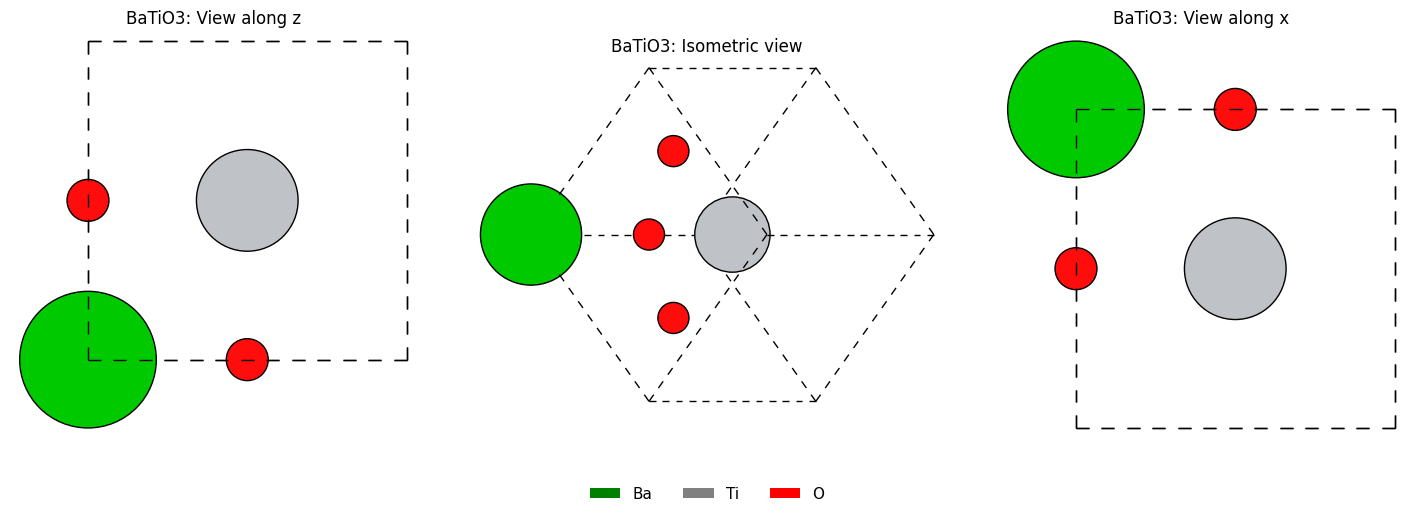


Figure saved to: /home/niel/git/DFT_Tutorial/qe_workshop_complete/outputs/02_validation_BaTiO3_structure.png


In [11]:
# =============================================================================
# VISUALIZE THE STRUCTURE
# =============================================================================

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Three different viewing angles
rotations = ['0x,0y,0z', '45x,45y,0z', '90x,0y,0z']
titles = ['View along z', 'Isometric view', 'View along x']

for ax, rot, title in zip(axes, rotations, titles):
    plot_atoms(batio3, ax, radii=0.4, rotation=rot)
    ax.set_title(f'{MATERIAL}: {title}', fontsize=12)
    ax.axis('off')

# Add color legend
from matplotlib.patches import Circle
fig.legend(
    handles=[
        Circle((0,0), 0.1, facecolor='green', label='Ba'),
        Circle((0,0), 0.1, facecolor='gray', label='Ti'),
        Circle((0,0), 0.1, facecolor='red', label='O'),
    ],
    loc='lower center', ncol=3, fontsize=11, frameon=False
)

plt.tight_layout()
plt.subplots_adjust(bottom=0.15)

# Save figure
fig_path = OUTPUT_DIR / f'02_validation_{MATERIAL}_structure.png'
fig.savefig(fig_path, dpi=150, bbox_inches='tight')
plt.show()

print(f"\nFigure saved to: {fig_path}")

In [12]:
# =============================================================================
# IF VALIDATION PASSED: Run Quick DFT Verification
# =============================================================================
# This confirms the structure works in QE before spending hours on production runs

if is_valid:
    print("Structure passed validation! Running DFT verification...\n")
    
    # Setup
    elements = list(set(batio3.get_chemical_symbols()))
    pp_files = setup_pseudopotentials(elements, functional='PBE')
    ecutwfc, ecutrho = get_recommended_cutoffs(elements, 'PBE')
    
    # Create calculation directory
    calc_dir = OUTPUT_DIR / f'02_validation_{MATERIAL}_{datetime.now().strftime("%Y%m%d_%H%M%S")}'
    calc_dir.mkdir(parents=True, exist_ok=True)
    
    prefix = MATERIAL.lower().replace(' ', '_') + '_verify'
    input_file = calc_dir / f'{prefix}.in'
    
    pseudopotentials = {elem: get_pseudopotential_filename(elem, 'PBE') for elem in elements}
    input_data = {
        'control': {'calculation': 'scf', 'prefix': prefix, 'outdir': './tmp',
                   'pseudo_dir': str(get_pseudo_dir('PBE')), 'tprnfor': True, 'tstress': True},
        'system': {'ecutwfc': min(ecutwfc, 60), 'ecutrho': min(ecutrho, 480),  # Lower for quick test
                  'occupations': 'smearing', 'smearing': 'cold', 'degauss': 0.01},
        'electrons': {'conv_thr': 1.0e-6},
    }
    
    write_espresso_in(input_file, batio3, input_data=input_data, 
                      pseudopotentials=pseudopotentials, kpts=(4, 4, 4))
    
    # Run quick verification
    output, elapsed, converged = run_qe(input_file, nprocs=NPROCS)
    results = parse_qe_output(output)
    
    print(f"\n{'='*60}")
    print(f"DFT VERIFICATION RESULTS: {MATERIAL}")
    print(f"{'='*60}")
    print(f"Converged: {'✓ YES' if converged else '✗ NO'}")
    print(f"Time: {elapsed:.1f} s")
    
    if converged and results['total_energy_ev']:
        print(f"\nTotal energy: {results['total_energy_ev']:.6f} eV")
        print(f"Energy per atom: {results['total_energy_ev']/len(batio3):.6f} eV/atom")
        if results['pressure_kbar']:
            print(f"Pressure: {results['pressure_kbar']:.2f} kbar")
        print(f"\n✅ Structure verified! Ready for production calculations.")
    else:
        print(f"\n⚠ DFT did not converge - check structure or parameters")
else:
    print("⚠ Structure failed validation - fix issues before running DFT!")

Structure passed validation! Running DFT verification...

PSEUDOPOTENTIAL SETUP - PBE
  ✓ Ti: Ti.pbe-spn-kjpaw_psl.1.0.0.UPF
  ✓ O: O.pbe-n-kjpaw_psl.1.0.0.UPF
  ✓ Ba: Ba.pbe-spn-kjpaw_psl.1.0.0.UPF
Pseudopotentials ready in: /home/niel/git/DFT_Tutorial/qe_workshop_complete/pseudopotentials/PBE
Running: /usr/bin/mpirun -np 8 /home/niel/src/qe-7.5/bin/pw.x -in batio3_verify.in
  ✓ Converged in 370.2s

DFT VERIFICATION RESULTS: BaTiO3
Converged: ✓ YES
Time: 370.2 s

Total energy: -10144.035891 eV
Energy per atom: -2028.807178 eV/atom
Pressure: 21.87 kbar

✅ Structure verified! Ready for production calculations.


---

## 8. STUDENT EXERCISE: Validate Your Own Structure

Try validating a different material! Here are some suggestions with known issues to watch for:

| Material | Structure | Potential Issues |
|----------|-----------|------------------|
| **LiCoO2** | Layered | Check Li-O, Co-O distances |
| **Fe3O4** | Spinel | Magnetic! Needs nspin=2 |
| **TiO2** | Multiple polymorphs | Make sure you have the right one! |
| **ZnS** | Zincblende/Wurtzite | Two polymorphs exist |

**Challenge**: Can you find a structure that FAILS validation? What's wrong with it?

---

## Summary

In this notebook, we learned:

1. ✓ How to check charge neutrality of compounds
2. ✓ Shannon ionic radii for bond length estimation
3. ✓ Lattice parameter estimation methods
4. ✓ Space group identification with spglib
5. ✓ Converting structures to QE format
6. ✓ Comprehensive validation checklist

### Key Takeaway

**Never skip structure validation!** A few minutes of checking can save hours of meaningless calculations.

### Next Notebook
→ **03_DFT_Setup_Fundamentals.ipynb**: Choosing functionals, pseudopotentials, and calculation parameters